This is a notebook to rank the featuresin a dataset , using the function select the kbest, this is a function that uses the chi square to do it


In [32]:
#import the libraries we are goint to use
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
plt.style.use('ggplot')


In [45]:
#read the csv, delete the label column 
df = pd.read_csv("Train_Agua_postpre_equilibrado.csv", header=0)
df = df.drop(['x','y','No'], axis=1)
df1 = df.drop(['Label'], axis=1)
df1.head()

,Red,Green,Blue,Hue,Saturation,Value
0,120.0,116.0,120.0,150.0,9.0,120.0
1,149.0,150.0,162.0,118.0,20.0,162.0
2,102.0,105.0,113.0,112.0,25.0,113.0
3,183.0,183.0,189.0,120.0,8.0,189.0
4,142.0,132.0,129.0,7.0,23.0,142.0


In [46]:
# convert to numpy and transform and accomodates the data 
data = df.to_numpy()
X = data[:, 0:-1] 
y = data[:, -1]

print(X.shape, y.shape)


(3013393, 6) (3013393,)


In [47]:
for i in range(len(y)):
    if y[i] == 2:
        y[i] = 1
    else:
        y[i] = 0

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
print(np.shape(X_train),np.shape(X_test))

(1506696, 6) (1506697, 6)


In [ ]:
# fit the decision tree classifier  
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)


In [ ]:
feature_importances = clf.feature_importances_
feature_importances

In [ ]:
dfscores = pd.DataFrame(feature_importances)
dfcolumns = pd.DataFrame(df1.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.head()

In [ ]:
#
sns.barplot(featureScores, x="Specs", y="Score")
plt.title("Features importance for sargassum detection in water") 

## Correlation matrix

In order to know the correlation between the features

In [42]:
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index



In [43]:
top_corr_features

Index(['Red', 'Green', 'Blue', 'Hue', 'Saturation', 'Value'], dtype='object')

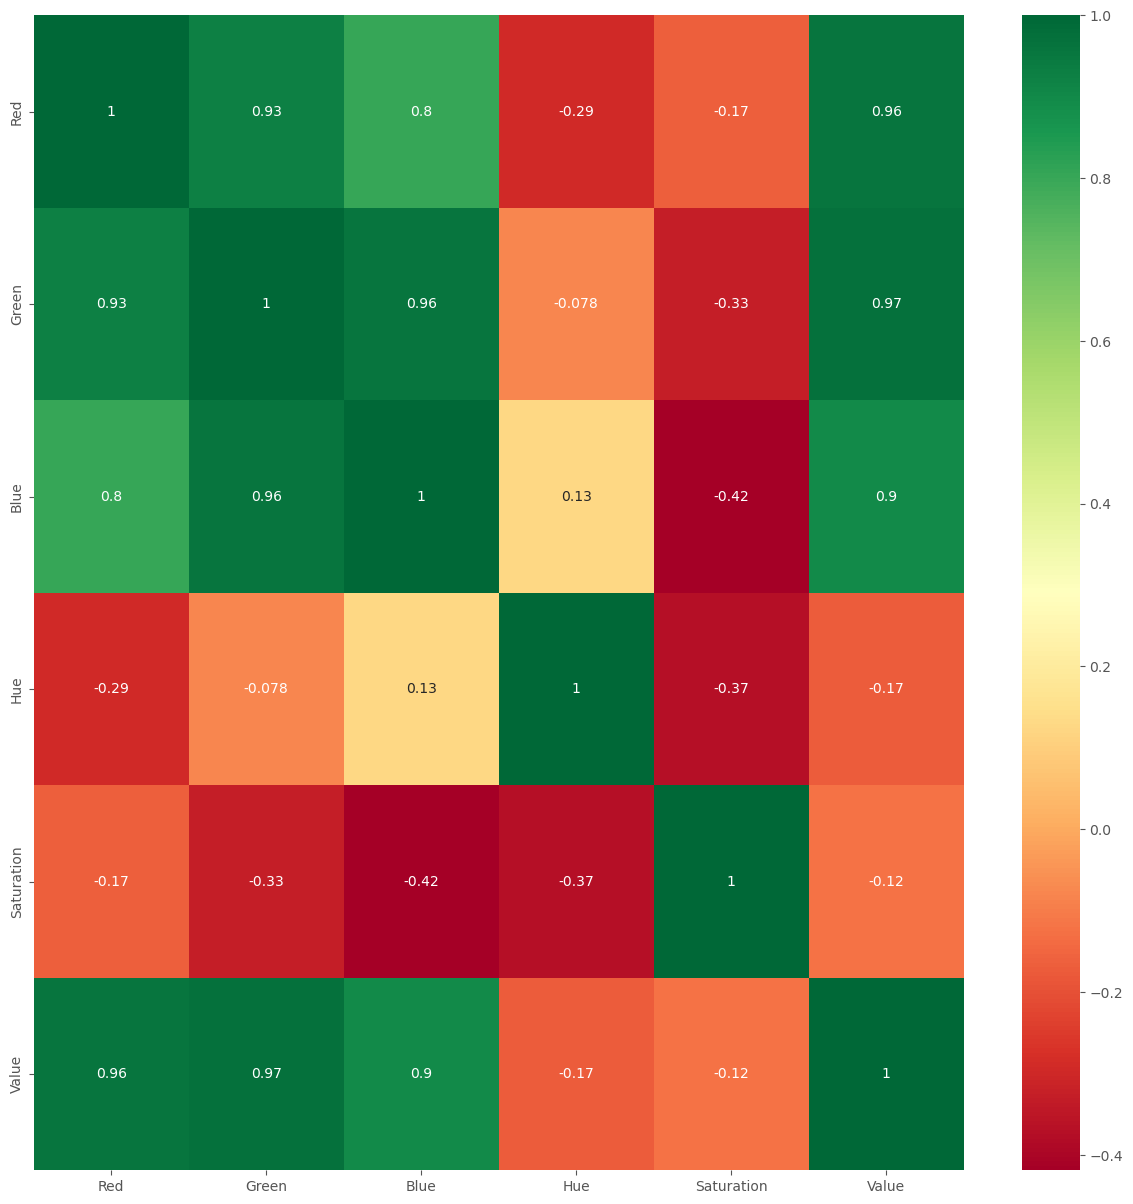

In [44]:
#plot heat map
plt.figure(figsize=(15,15))
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")